Mean absolute error in train dataset: 37763.68
Mean absolute error in test dataset: 37075.35

R2 score in train dataset: 0.49
R2 score in test dataset: 0.52


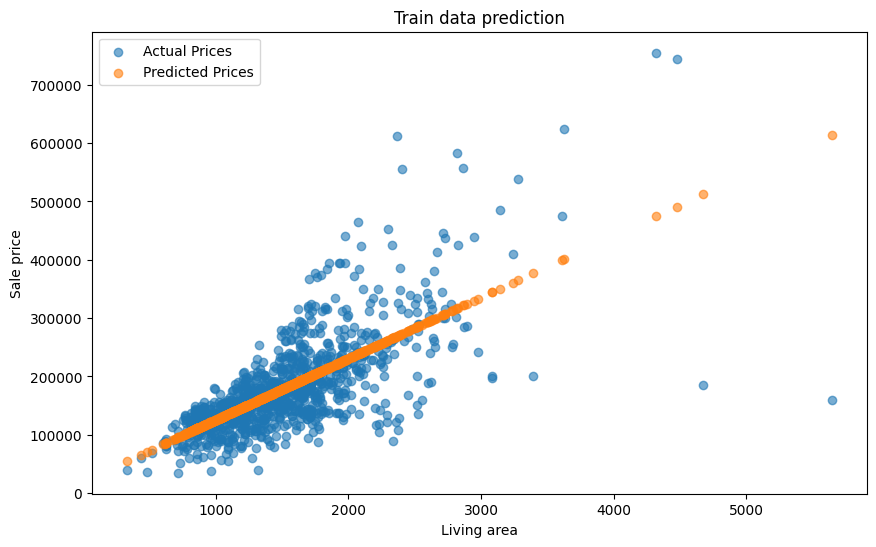

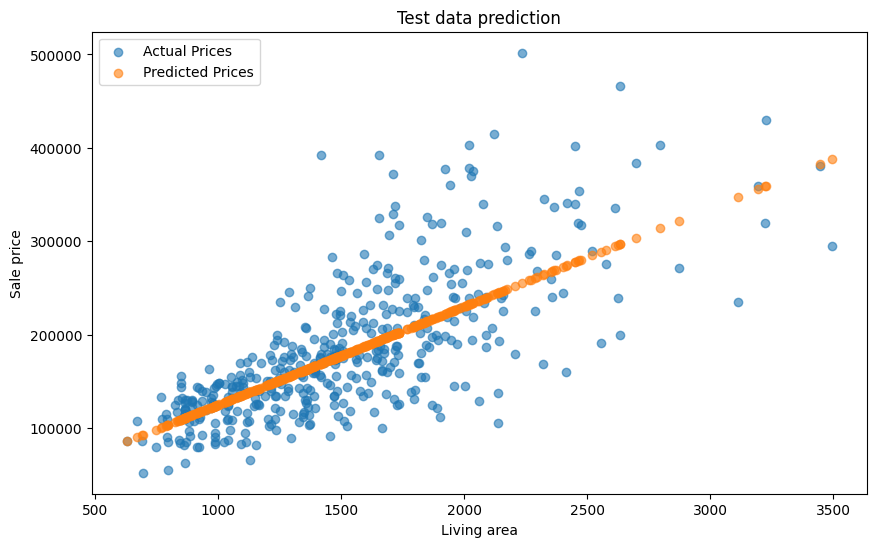

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load CSV containing housing prices into Pandas DataFrame
df = pd.read_csv("HousePrice.csv")

# # Get basic information about data
# print(df[["GrLivArea", "SalePrice"]].info())        # display information about relevant columns
# print(df[["GrLivArea", "SalePrice"]].head())        # display first 5 rows
# print(df[["GrLivArea", "SalePrice"]].isna().sum())  # Check missing values, handle them (drop or impute) if exists

# Retrieve feature and response from DataFrame
X = df[["GrLivArea"]]   # feature / input
y = df["SalePrice"]     # response / putput

# # Split data into train (70%) and test (30%) sets, random_state parameter makes the random split reproducible
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )

# Split data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

# Train the linear regression model on the training dataset
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Predict on train and test datasets
prediction_train = linreg_model.predict(X_train)
prediction_test = linreg_model.predict(X_test)

# Evaluate and display model accuracy with Mean Absolute Error for both train and test datasets
print(f"Mean absolute error in train dataset: {mean_absolute_error(y_train, prediction_train):.2f}")
print(f"Mean absolute error in test dataset: {mean_absolute_error(y_test, prediction_test):.2f}")

# Evaluate and display model accuracy with R2 Score for both train and test datasets
print(f"\nR2 score in train dataset: {r2_score(y_train, prediction_train):.2f}")
print(f"R2 score in test dataset: {r2_score(y_test, prediction_test):.2f}")

# Plot predictions vs actuals on train dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train["GrLivArea"], y_train, label="Actual Prices", alpha=0.6)
plt.scatter(X_train["GrLivArea"], prediction_train, label="Predicted Prices", alpha=0.6)
plt.title("Train data prediction")
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.legend(loc="upper left")
plt.show()

# Plot predictions vs actuals on test dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test["GrLivArea"], y_test, label="Actual Prices", alpha=0.6)
plt.scatter(X_test["GrLivArea"], prediction_test, label="Predicted Prices", alpha=0.6)
plt.title("Test data prediction")
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.legend(loc="upper left")
plt.show()